# Exercise Set 04: Distributions and Extreme Values

BEE 4850/5850, Fall 2024

**Name**: Anthony Nicolaides

**ID**: ajn68

> **Due Date**
>
> Friday, 2/16/24, 9:00pm

## Overview

### Instructions

The goal of this exercise is for you to explore how distributional
assumptions can influence estimates of extreme values and return levels.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Documents/BEE5850/exercises/ex_week04_BEE5850`


The following packages are included in the environment (to help you find
other similar packages in other languages). The code below loads these
packages for use in the subsequent notebook (the desired functionality
for each package is commented next to the package).

In [2]:
using DataFrames # tabular data structure
using Distributions # API to work with statistical distributions
using Plots # plotting library
using StatsBase # statistical quantities like mean, median, etc
using StatsPlots # some additional statistical plotting tools
using Optim # optimization tools

using Random # set seed for random picking

## Problems

### Problem 1

We represent an experimental data-generating process by finding the
maximum value of 100 draws from $\mathcal{N}(2.5, 10)$. Repeat this
experiment 1,000 times and plot the histogram of resulting maxima. What
can you conclude about the distribution of the maxima?

In [3]:
Random.seed!(1)
maxima_list = Vector{Float64}()
normal_dist = Normal(2.5, 10) # N(2.5, 10)
for _ in 1:1000 # repeat 1000 times
    draws = rand(normal_dist, 100) # 100 draws from noram distribution
    maxima = maximum(draws)  # find the maximum value
    push!(maxima_list, maxima) # record maximum value
end

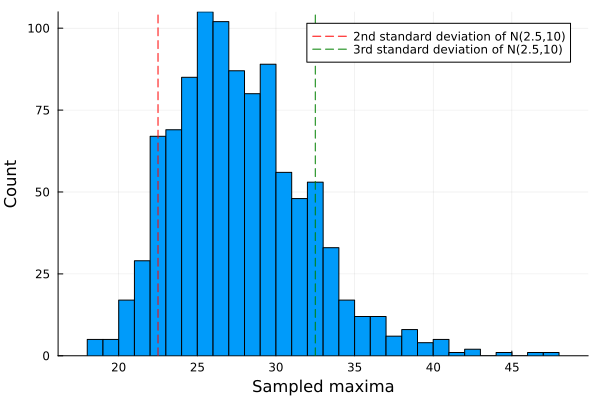

In [4]:
histogram(maxima_list, legend=:true, bins=50, label="")
xlabel!("Sampled maxima")
ylabel!("Count")
vline!([mean(normal_dist) + 2std(normal_dist)],
    line=:dash, color=:red, label="2nd standard deviation of N(2.5,10)")
vline!([mean(normal_dist) + 3std(normal_dist)],
    line=:dash, color=:green, label="3rd standard deviation of N(2.5,10)")

The distribution of the maxima seems to be mostly in the 3rd standard deviation above the mean (about 22.5 to 32.5 range). The mean of the maxima distribution is also greater than the normal mean since its always going to pick the largest number out of the distribution. The maxima distribution is also asymmetric with a heavier right tail, which makes sense since the distribution favors larger numbers. 

I suppose with more draws of N(2.5, 10) the distribution will shift more towards the right since you give more chances for larger numbers to be picked. Also with more repeats, the distribution should smoothen out more since the same numbers will be consistenly picked over and over.

### Problem 2

Fit (through maximum likelihood) the following distributions to your
data from Problem 1.

1.  A Normal (`Normal`) distribution;
2.  A Cauchy (`Cauchy`) distribution;
3.  A Weibull (`Weibull`) distribution;
4.  A Fréchet (`Frechet`) distribution.

> **Note**
>
> As we will talk about next week, the Weibull and Fréchet distributions
> are special cases of a Generalized Extreme Value (GEV) distribution.
> But more on this later!

In [5]:
function mle_fit_distribution(dist, data)
    # Fits a distribution dist using MLE to data
    function neg_log_likelihood(params)
        # Construct the distribution
        dist_instance = dist(params[1], params[2])
        # Compute the negative log-likelihood
        return -sum(logpdf(dist_instance, x) for x in data)
    end

    # set up range and initial value

    initial_params = [1.0, 1.0]
    # Get errors from some distributions 
    #   unless there is a lower and upper bound
    upper = [1000.0, 1000.0] # arbitrarily large 
    lower = [0.0, 0.0] # no negative values
    # Minimize the negative log-likelihood
    result = optimize(params -> neg_log_likelihood(params),
        lower, upper, initial_params)
    params = Optim.minimizer(result)
    return params
end

mle_fit_distribution (generic function with 1 method)

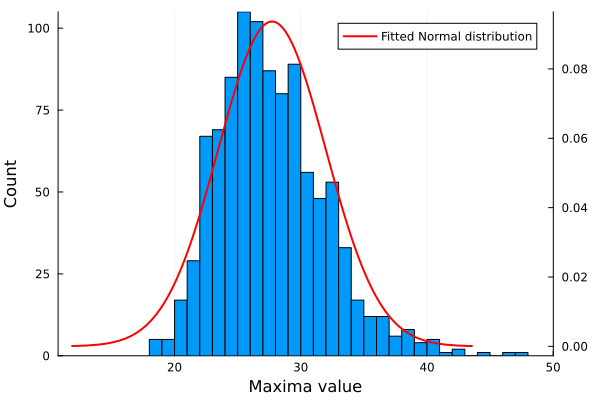

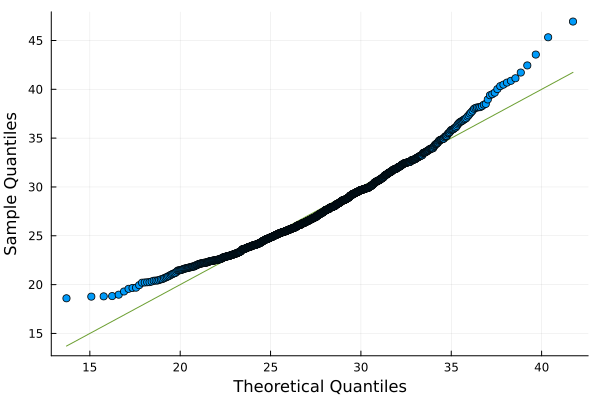

Return level associated with an exceedance probability of 0.01
    Fitted Normal: 37.630072196175306
    Observed: 40.31105055474825

In [6]:
normal_params = mle_fit_distribution(Normal, maxima_list)

histogram(maxima_list, legend=:false, bins=50,
    xlabel="Maxima value", ylabel="Count")
display(plot!(twinx(), Normal(normal_params[1], normal_params[2]),
    linecolor=:red, linewidth=:2,
    label="Fitted Normal distribution")
)

display(
    qqplot(Normal(normal_params[1], normal_params[2]), maxima_list,
        xlabel="Theoretical Quantiles", ylabel="Sample Quantiles")
)

normal_return = quantile(Normal(normal_params[1], normal_params[2]), 0.99)
print("Return level associated with an exceedance probability of 0.01
    Fitted Normal: ", normal_return,
    "\n    Observed: ", quantile(maxima_list, 0.99))

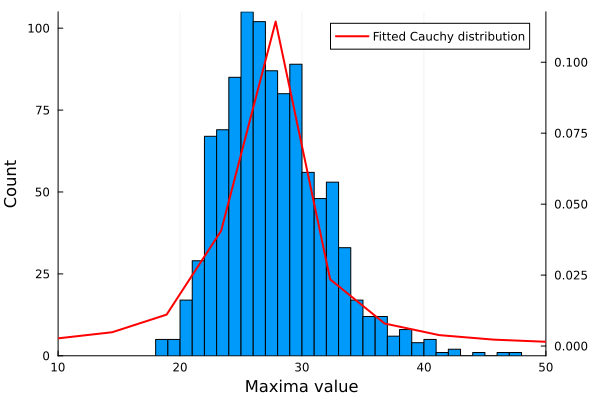

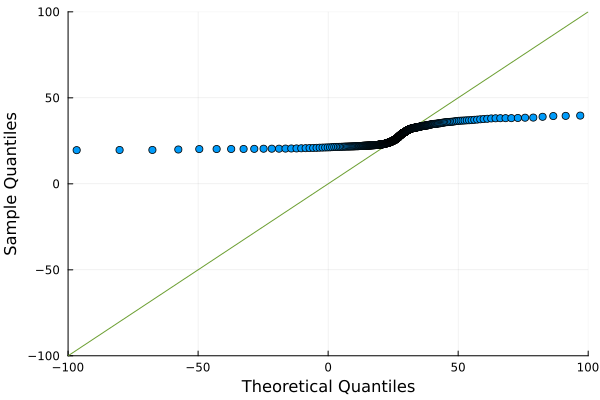

Return level associated with an exceedance probability of 0.01
    Fitted Cauchy: 107.44090030812876
    Observed: 40.31105055474825

In [7]:
cauchy_params = mle_fit_distribution(Cauchy, maxima_list)

histogram(maxima_list, legend=:false, bins=50,
    xlabel="Maxima value", ylabel="Count", xlims=(10, 50))
display(
    plot!(twinx(), Cauchy(cauchy_params[1], cauchy_params[2]),
        xlims=(10, 50),
        linecolor=:red, linewidth=:2,
        label="Fitted Cauchy distribution")
)

display(
    qqplot(Cauchy(cauchy_params[1], cauchy_params[2]), maxima_list,
        xlabel="Theoretical Quantiles", ylabel="Sample Quantiles",
        xlims=(-100, 100), ylims=(-100, 100))
)

cauchy_return = quantile(Cauchy(cauchy_params[1], cauchy_params[2]), 0.99)
print("Return level associated with an exceedance probability of 0.01
    Fitted Cauchy: ", cauchy_return,
    "\n    Observed: ", quantile(maxima_list, 0.99))

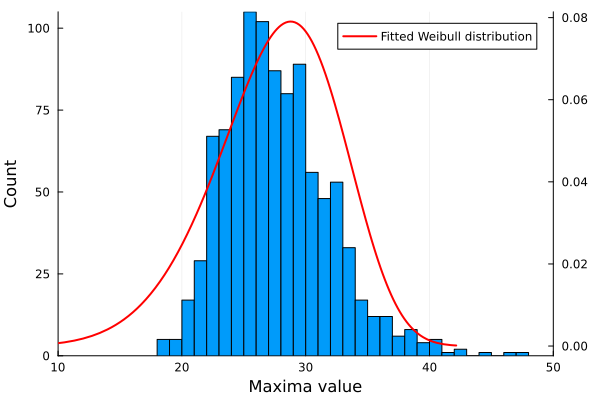

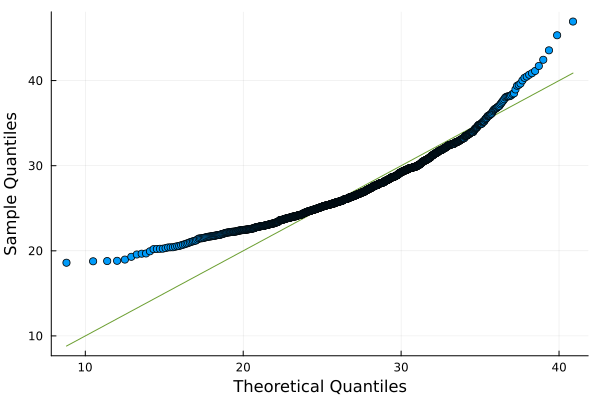

Return level associated with an exceedance probability of 0.01
    Fitted Weibull: 37.74540230047216
    Observed: 40.31105055474825

In [8]:
weibull_params = mle_fit_distribution(Weibull, maxima_list)

histogram(maxima_list, legend=:false, bins=50,
    xlabel="Maxima value", ylabel="Count", xlims=(10, 50))
display(
    plot!(twinx(), Weibull(weibull_params[1], weibull_params[2]),
        xlims=(10, 50),
        linecolor=:red, linewidth=:2,
        label="Fitted Weibull distribution")
)

display(
    qqplot(Weibull(weibull_params[1], weibull_params[2]), maxima_list,
        xlabel="Theoretical Quantiles", ylabel="Sample Quantiles")
)

weibull_return = quantile(Weibull(weibull_params[1], weibull_params[2]),
    0.99)
print("Return level associated with an exceedance probability of 0.01
    Fitted Weibull: ", weibull_return,
    "\n    Observed: ", quantile(maxima_list, 0.99))

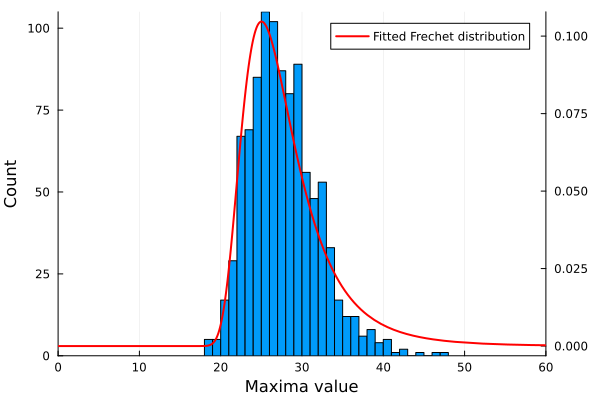

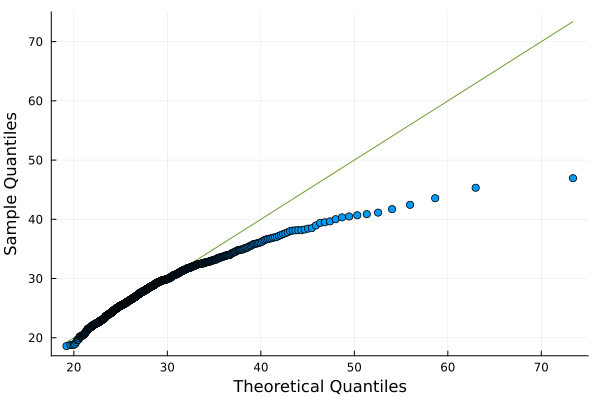

Return level associated with an exceedance probability of 0.01
    Fitted Frechet: 48.3328339989435
    Observed: 40.31105055474825

In [9]:
frechet_params = mle_fit_distribution(Frechet, maxima_list)

histogram(maxima_list, legend=:false, bins=50,
    xlabel="Maxima value", ylabel="Count", xlims=(0, 60))
display(
    plot!(twinx(), Frechet(frechet_params[1], frechet_params[2]),
        xlims=(0, 60),
        linecolor=:red, linewidth=:2,
        label="Fitted Frechet distribution")
)

display(
    qqplot(Frechet(frechet_params[1], frechet_params[2]), maxima_list,
        xlabel="Theoretical Quantiles", ylabel="Sample Quantiles")
)

frechet_return = quantile(Frechet(frechet_params[1], frechet_params[2]),
    0.99)
print("Return level associated with an exceedance probability of 0.01
    Fitted Frechet: ", frechet_return,
    "\n    Observed: ", quantile(maxima_list, 0.99))

How well do they fit the distribution of maxima (plot the fitted
distributions over your histogram in one or more plots, use Q-Q plots,
etc.)? What is the return level associated with an exceedance
probability of 0.01, and how does this compare to the observed quantile?

Normal Distribution - 

The normal distribution does a fairly good job at fitting to the maxima. Based on the QQ plot ( and visually), the maxima distribution has a heavy right tail and light left tail, which is umlike the symmtry of a normal distribution. The return level of the normal is about 37.6 while the observed is about 40. These are very close to one another, but the normal distribution is slightly larger due to the maxima's slightly heavy right tail.


Cauchy Distribution - 

The cauchy distribution does not do a good job fitting to the maxima. Cauchy distribution has leavy long tails (shown by the QQ plot) such that it doesn't make for a good fit to the maxima distribution. The return level of the cuachy also relfects this, 107 is very high compared to the maxima's 40.

Weibull Distribution - 

The weibull distribution looks like a slightly worse version of the normal fitted distribution. In general the weibull distribution has a slightly heavier left tail than right, which probably explains why it is slightly worse at fitting to the maxima. The return level, 37.7, however is very similar to that of the fitted normal. I beileve this is because the right tail follows a very similar trend to a normal distribution's right tail.

Frechet distribution - 

The frechet distribution does an ok job at fitting. It seems to be a good fit around the mean and left tail. However, the frechet distribution has a very heavy right tail which makes the fit inaccurate at large values (based on the QQ plot). It could be that with more samples, the right tail of the maxima distribution will fill in more and make the frechet distribution a better fit, however with this amount of samples, it only fits well around the mean. The return level of the frechet distribution is about 48 which is close to 40 (depending on the context). Again, frechet's large right tail is probably why the  return level is slightly higher than the maxima's.

## References

BEE 5850 Lecture 06 - "Model-Data Discrepancy and Bayesian Statistics" 

        - for code on MLE

https://juliaeconomics.com/2014/06/16/numerical-maximum-likelihood-the-ols-example/

        - for more explaination on MLE in Julia
